<a href="https://colab.research.google.com/github/SonakshiA/Handwritten-Digit-Classification/blob/main/Handwritten_Character_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import tensorflow_datasets as tfds

Citation

@article{lecun2010mnist,
  title={MNIST handwritten digit database},
  author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
  journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
  volume={2},
  year={2010}
}

In [26]:
(xtrain, ytrain), (xtest, ytest) = tf.keras.datasets.mnist.load_data()

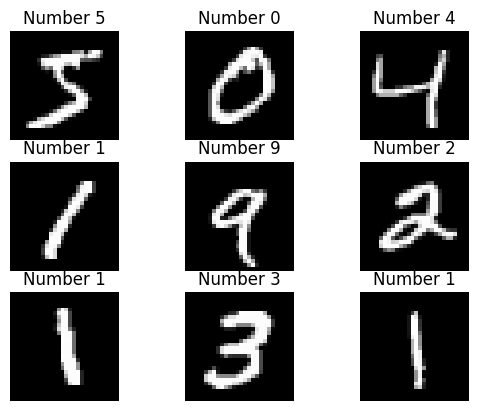

In [27]:
for i in range(9):
  ax = plt.subplot(3,3,i+1) #rows, columns and label
  plt.imshow(xtrain[i], cmap = plt.get_cmap('gray'))
  plt.title("Number {}".format(ytrain[i]))
  plt.axis('off')

#**One Hot Encoding the Labels**

In [30]:

ytrain = tf.keras.utils.to_categorical(ytrain)
ytest = tf.keras.utils.to_categorical(ytest)

In [29]:
rows,cols=28,28
xtrain = xtrain.reshape(xtrain.shape[0],rows,cols,1)
xtest = xtest.reshape(xtest.shape[0],rows,cols,1)
inpx = (rows,cols,1)
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')
xtrain/=255.0
xtest/=255.0
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


##**Neural Network Implementation**

In [37]:
model = models.Sequential()
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu')) #Dense(128) is a fully connected layer
model.add(layers.Dense(10,activation='softmax'))

In [39]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.001),loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])
#optimizer: tool to help us adjust the different weights to get minimum loss
#from_logits = True signifies the values of the loss obtained by the model are not normalized i.e not between 0 and 1

In [40]:
model.fit(xtrain,ytrain,epochs=10,batch_size=16)

Epoch 1/10
3750/3750 [==============================] - 180s 48ms/step - loss: 0.1782 - accuracy: 0.9432
Epoch 2/10
3750/3750 [==============================] - 176s 47ms/step - loss: 0.0757 - accuracy: 0.9767
Epoch 3/10
3750/3750 [==============================] - 175s 47ms/step - loss: 0.0634 - accuracy: 0.9798
Epoch 4/10
3750/3750 [==============================] - 175s 47ms/step - loss: 0.0551 - accuracy: 0.9827
Epoch 5/10
3750/3750 [==============================] - 172s 46ms/step - loss: 0.0508 - accuracy: 0.9847
Epoch 6/10
3750/3750 [==============================] - 177s 47ms/step - loss: 0.0488 - accuracy: 0.9852
Epoch 7/10
3750/3750 [==============================] - 174s 46ms/step - loss: 0.0464 - accuracy: 0.9855
Epoch 8/10
3750/3750 [==============================] - 176s 47ms/step - loss: 0.0428 - accuracy: 0.9871
Epoch 9/10
3750/3750 [==============================] - 178s 47ms/step - loss: 0.0428 - accuracy: 0.9875
Epoch 10/10
3750/3750 [==============================] 

#**Accuracy**

In [92]:
score = model.evaluate(xtest, ytest)
print('Test accuracy:', score[1])

313/313 [==============================] - 8s 25ms/step - loss: 0.0292 - accuracy: 0.9908
Test accuracy: 0.9908000230789185


#**Making Predictions**

In [89]:
predictions = model.predict(xtest)

313/313 [==============================] - 6s 20ms/step


In [90]:
labels = ['0','1','2','3','4','5','6','7','8','9']
results = np.argmax(predictions,axis = 1)
print(results)

[7 2 1 ... 4 5 6]


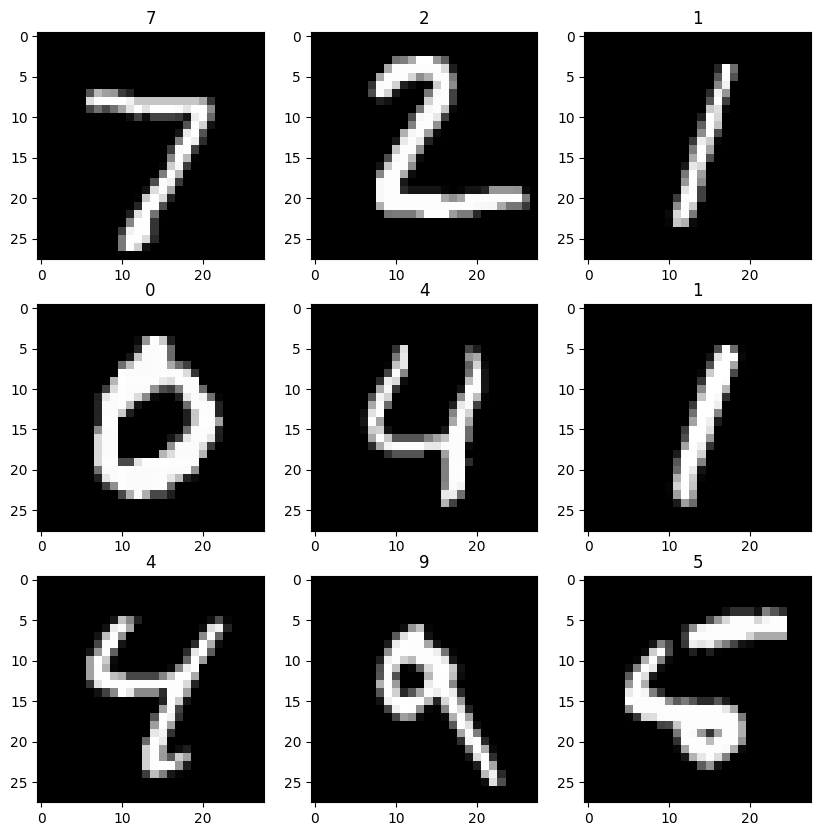

In [91]:
plt.figure(figsize=(10,10))
for i in range(9):
  ax = plt.subplot(3,3,i+1) #rows, columns and label
  plt.imshow(xtest[i],cmap = plt.get_cmap('gray'))
  plt.title(results[i])